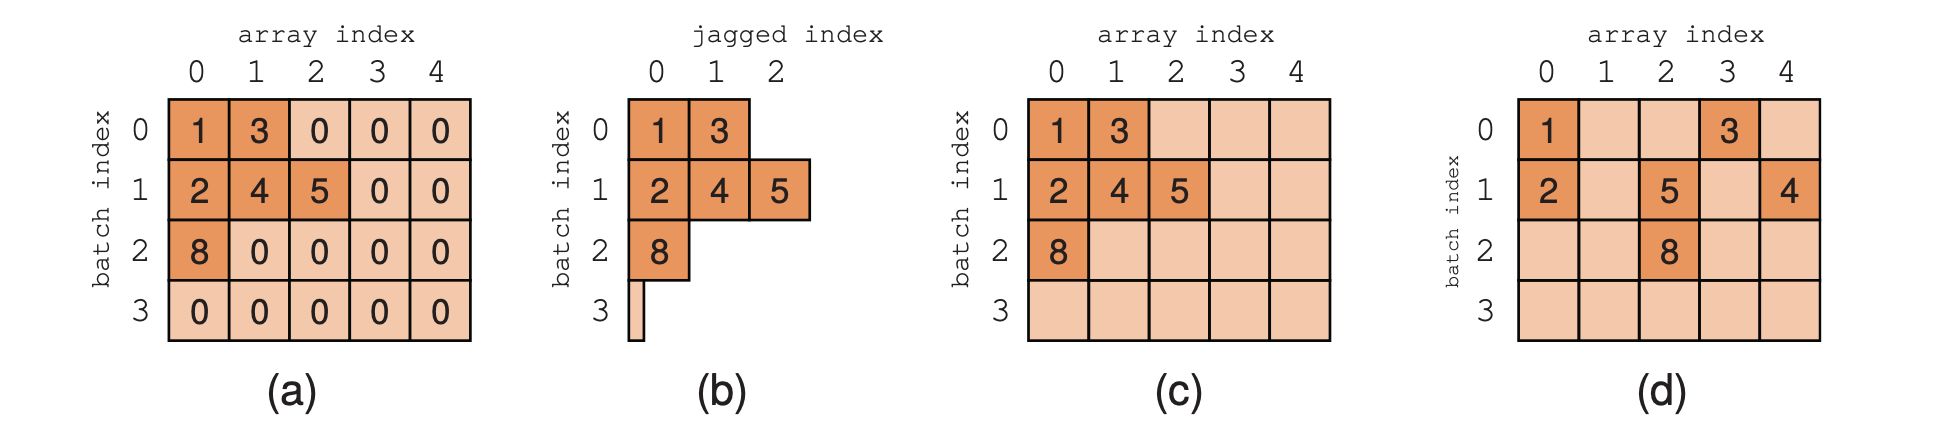

In [2]:
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix

def left_align_sparse(sparse_mtx):
    rows, cols = sparse_mtx.nonzero()
    data = sparse_mtx.data
    
    new_cols = np.zeros_like(cols)
    for r in np.unique(rows):
        mask = (rows == r)
        new_cols[mask] = np.arange(np.sum(mask))
        
    aligned = coo_matrix((data, (rows, new_cols)), shape=sparse_mtx.shape)
    return aligned.tocsr()

def index_to_binary(indices, num_classes):
    num_samples = len(indices)
    rows = np.arange(num_samples)
    cols = indices
    data = np.ones(num_samples)
    
    indicator = coo_matrix((data, (rows, cols)), shape=(num_samples, num_classes))
    return indicator.tocsr()

# 8.1 Exercise
raw_data = np.array([[0, 5, 0, 8], [2, 0, 0, 0], [0, 0, 3, 1]])
sparse_in = csr_matrix(raw_data)
aligned_out = left_align_sparse(sparse_in)


binary_mtx = index_to_binary(category_indices, num_classes=3)

print("8.1 Original:\n", sparse_in.toarray())
print("8.1 Left Aligned:\n", aligned_out.toarray())
print("8.2 Binary Indicator:\n", binary_mtx.toarray())

8.1 Original:
 [[0 5 0 8]
 [2 0 0 0]
 [0 0 3 1]]
8.1 Left Aligned:
 [[5 8 0 0]
 [2 0 0 0]
 [3 1 0 0]]
8.2 Binary Indicator:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 8.5 Case Study: Autoencoders with Sparse Inputs

# 8.5.1 Embedding Lookup on Sparse Inputs

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

def sparse_embedding_lookup(sparse_input, embedding_table):
    row_indices, col_indices = sparse_input.nonzero()
    data_values = sparse_input.data
    
    embeddings = embedding_table[col_indices]
    
    weighted_embeddings = embeddings * data_values[:, np.newaxis]
    
    num_rows = sparse_input.shape[0]
    embedding_dim = embedding_table.shape[1]
    output = np.zeros((num_rows, embedding_dim))
    
    np.add.at(output, row_indices, weighted_embeddings)
    
    return output

n_features = 1000
embedding_dim = 4
embeddings = np.random.rand(n_features, embedding_dim)

data = np.array([[1.5, 0, 0, 2.0], [0, 0, 3.5, 0]])
sparse_in = csr_matrix(data)

# Re-adjusting embedding table for the small sample size
sample_embeddings = np.random.rand(4, 4) 

result = sparse_embedding_lookup(sparse_in, sample_embeddings)

print("Sparse Input Shape:", sparse_in.shape)
print("Sparse Input Matrix:\n", sparse_in.toarray())
print("\nEmbedding Table Shape:", sample_embeddings.shape)
print("Embedding Table Matrix:\n", sample_embeddings)
print("Resulting Dense Projection:\n", result)

Sparse Input Shape: (2, 4)
Sparse Input Matrix:
 [[1.5 0.  0.  2. ]
 [0.  0.  3.5 0. ]]

Embedding Table Shape: (4, 4)
Embedding Table Matrix:
 [[0.8817337  0.28191284 0.82890345 0.39985008]
 [0.00157555 0.75154727 0.4567516  0.12067045]
 [0.32334178 0.97103732 0.93130512 0.65698102]
 [0.83752499 0.94628823 0.86186145 0.77640021]]
Resulting Dense Projection:
 [[2.99765053 2.31544572 2.96707807 2.15257552]
 [1.13169622 3.39863061 3.25956792 2.29943358]]
